#### <div style="text-align: center"> ALEXANDRA GOLAB (41712)

## <div style="text-align: center">Machine Learning - Neural Networks Project




### Table of contents

#### [ 1 - Importing Data](#a)
#### [ 2 - Uploading images and splitting into train and test sets](#b)
#### [ 3 - Models](#c)
#### [ 4 - Model evaluation](#d)
#### [ 5 - Visualization](#e)
#### [ 6 - Testing model on a picture ](#f)
#### [ 7 - Saving model](#g)



In [1]:
## Libraries
import pandas as pd
import numpy as np
import cv2 #to convert images into arrays
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import os, re
from keras.preprocessing.image import load_img, img_to_array, image
from tqdm import tqdm
from imports_for_ML import load_images ## to import the images
## importing all the libraries for our models
from sklearn.model_selection import train_test_split ## to split our training sample
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from PIL import Image

Using TensorFlow backend.


## 1. Importing Data <a name="a">

In [3]:

img_dir = r'C:\\Users\\Alexandra\\Desktop\\University\\4th semester\\Python\\class 2\\train' ##where the images can be founded
test  = r'C:\\Users\\Alexandra\\Desktop\\University\\4th semester\\Python\\class 2\\test'

images = os.listdir(img_dir)

In [4]:
train_data = [os.path.join(img_dir, img) for img in images]
test_data=  [os.path.join(img_dir, img) for img in images]

In [5]:
train_data[:3]

['C:\\\\Users\\\\Alexandra\\\\Desktop\\\\University\\\\4th semester\\\\Python\\\\class 2\\\\train\\cat.0.jpg',
 'C:\\\\Users\\\\Alexandra\\\\Desktop\\\\University\\\\4th semester\\\\Python\\\\class 2\\\\train\\cat.1.jpg',
 'C:\\\\Users\\\\Alexandra\\\\Desktop\\\\University\\\\4th semester\\\\Python\\\\class 2\\\\train\\cat.10.jpg']

In [6]:
len(train_data)

25000

## 2. Loading images and splitting it into train and test sets <a name="b">

In [7]:
from imports_for_ML import load_images

X, y = load_images(img_dir, n_images=10000, resize=(50, 50))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [8]:
## Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

In [13]:
## Checking shape of our train set 
X_train.shape

(9000, 50, 50, 3)

In [14]:
## Checking shape of our test set
X_test.shape

(1000, 50, 50, 3)

## 3. Creating models<a name="c">

#### 3.1 Creating a baseline model  that contains:


Five hidden layers ( 4 convolutional layers + 1 dense) with an activation function='relu':

- 16 filters for the first two conv2D layers,each 3 x 3 + depth.
- 32 filters for the second two conv2D layers, each 3 x 3 + depth.

After each Conv2D, we use max MaxPooling2D in the first 2 Conv2D, we divide the image into 3 x 3 and in the other 2 Conv2D we use 2 x 2. Then, we use flatten to roll out the before layer into one vector and we add normal layer 'Dense' with 64 neurons.  
Additionally, we add dropout function to regularize the model. With this function, we try to reduce overfitting


In [90]:
# First CNN model

model = Sequential()

# we create two convolution layers, then max pooling

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# we create next two convolution layers, then max pooling


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



# finally, we flatten all the filters to one vector and then add 64 ordinary neurons

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 46, 46, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)              

In [92]:
batch_size= 32
epochs= 50
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_test, y_test), verbose = 2)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
 - 35s - loss: 0.7808 - accuracy: 0.5397 - val_loss: 0.6831 - val_accuracy: 0.5810
Epoch 2/50
 - 32s - loss: 0.6820 - accuracy: 0.5546 - val_loss: 0.6568 - val_accuracy: 0.5910
Epoch 3/50
 - 31s - loss: 0.6622 - accuracy: 0.5947 - val_loss: 0.6107 - val_accuracy: 0.6720
Epoch 4/50
 - 36s - loss: 0.6350 - accuracy: 0.6402 - val_loss: 0.5765 - val_accuracy: 0.6910
Epoch 5/50
 - 33s - loss: 0.5903 - accuracy: 0.6871 - val_loss: 0.5909 - val_accuracy: 0.6860
Epoch 6/50
 - 35s - loss: 0.5652 - accuracy: 0.7078 - val_loss: 0.5299 - val_accuracy: 0.7340
Epoch 7/50
 - 40s - loss: 0.5332 - accuracy: 0.7308 - val_loss: 0.5032 - val_accuracy: 0.7630
Epoch 8/50
 - 36s - loss: 0.5043 - accuracy: 0.7486 - val_loss: 0.5055 - val_accuracy: 0.7550
Epoch 9/50
 - 36s - loss: 0.4832 - accuracy: 0.7668 - val_loss: 0.4891 - val_accuracy: 0.7710
Epoch 10/50
 - 38s - loss: 0.4550 - accuracy: 0.7856 - val_loss: 0.4668 - val_accuracy: 0.7840
Epoch 11/50

In [93]:
print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

Accuracy on the training data:
9000/9000 [==============================] - 8s 879us/step
0.9904444217681885

Accuracy on the test data:
1000/1000 [==============================] - 1s 991us/step
0.7749999761581421


#####  It seems that our model is highly overfitting. We have almost 100% accurary in our training data and 77% in test.

- For the next model we are going to add another two Conv2d layers, and we will use the dropout functions which helps to overcome overfitting and  an optimizer 

### 3.2  Second model

This model will consist of 8 hidden layers )( 6 convolutional layers + 2 dense) with an activation function ='relu'

- 16 filters for the first two conv2D layers,each 3 x 3 + depth.
- 32 filters for the second two conv2D layers, each 3 x 3 + depth.
- 64 filters for the second two conv2D layers, each 3 x 3 + depth.
- 86 filters for the second two conv2D layers, each 3 x 3 + depth.


We apply MaxPool2d to donwsampling our filters. We use dropout =0.25 and for the last one 0.50 as a regularization method (used to improve our network). 


In [10]:
# Second CNN model 
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (50,50,3)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (50,50,3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))

# Compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 50, 50, 16)        448       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 25, 25, 16)        64        
_________________________________________________________________
dropout_16 (Dropout)         (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 25, 25, 32)        4640      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 25, 25, 32)       

In [98]:
batch_size= 32
epochs= 50

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_test, y_test), verbose = 2)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
 - 80s - loss: 0.7011 - accuracy: 0.5998 - val_loss: 1.0044 - val_accuracy: 0.5410
Epoch 2/50
 - 82s - loss: 0.6127 - accuracy: 0.6631 - val_loss: 0.6098 - val_accuracy: 0.6510
Epoch 3/50
 - 86s - loss: 0.5685 - accuracy: 0.7021 - val_loss: 0.7179 - val_accuracy: 0.5910
Epoch 4/50
 - 89s - loss: 0.5396 - accuracy: 0.7324 - val_loss: 0.5544 - val_accuracy: 0.7190
Epoch 5/50
 - 114s - loss: 0.4985 - accuracy: 0.7552 - val_loss: 0.6211 - val_accuracy: 0.7000
Epoch 6/50
 - 115s - loss: 0.4694 - accuracy: 0.7804 - val_loss: 0.5157 - val_accuracy: 0.7480
Epoch 7/50
 - 100s - loss: 0.4366 - accuracy: 0.7997 - val_loss: 0.4709 - val_accuracy: 0.7700
Epoch 8/50
 - 111s - loss: 0.4087 - accuracy: 0.8150 - val_loss: 0.5840 - val_accuracy: 0.7230
Epoch 9/50
 - 123s - loss: 0.3842 - accuracy: 0.8279 - val_loss: 0.4369 - val_accuracy: 0.7880
Epoch 10/50
 - 109s - loss: 0.3638 - accuracy: 0.8370 - val_loss: 0.4082 - val_accuracy: 0.8140
Epoch

In [99]:
print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

Accuracy on the training data:
9000/9000 [==============================] - 21s 2ms/step
0.9869999885559082

Accuracy on the test data:
1000/1000 [==============================] - 2s 2ms/step
0.8500000238418579


We can observe that by useing regularization, our model accuracy got better from 77% to 85%. This is a significant improvement.  However, although we have improved our model , we still have overfitting. Our model do not understand some pictures.

By getting a better model, we will use  **keras.preprocessing.image.ImageDataGenerator.'** It will avoid overfitting by expanding/alterating artifically our datset i.e: increase the scale of the pictures by 50 x 50, or rotate the images or cropping the pictures. 

Using reguralization, we come to the correctness slightly above 78%, almost 80%. This is a significant improvement, but we are still far from human correctness. However, we have seen that the networks do not understand the picture as we do - a picture that is an incomprehensible noise can convince the net that it has to do with a dog.

This is still not a model that we would be satisfied with in practice, but for playing on a weak computer it is ok. To have better accuracy, we would also need more data - i.e. all 25,000 photos to be loaded. We could also increase the scaling (currently we are scaling all the photos to 50 by 50 pixels - in this size some photos will be difficult to identify.
Also, with 25,000 photos you actually produce up to half a million photos - by rotating, scaling and cropping the photos (this can be done automatically using keras.preprocessing.image.ImageDataGenerator. This number of examples would lead our network to have much better accuracy.

Another strategy is to use a network previously trained on millions of photos (there are a lot of such public domain architectures - including some very well known architectures) and stick several hundred neurons to its top layers to classify dog vs. cat. Then the training would take place on such a hybrid network - a large part of it would be frozen, already trained before, and only the final layer (or layers) are trained using the available data. This kind of strategy is called transfer learning, it is the last of our struggle with image analysis. We won't take full advantage of transfer learning here - and we'll only see how helpful the networks already trained on millions of images are.

### 3.3 Final model 

As mentioned above, we will add to our previous model an alteration our dataset with some of below feauters among others :

- rotate randomply the images by 10 degrees
- zoom them by 10%
- Apply horizonal flip 

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(X_train)

In [17]:
# Set a learning_rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [104]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=64, shuffle=True),
                              epochs = 50, validation_data = (X_test,y_test),
                               steps_per_epoch=X_train.shape[0] // 64 )
                             ##, callbacks=[learning_rate_reduction])

Epoch 1/50
140/140 [==============================] - 91s 651ms/step - loss: 0.3396 - accuracy: 0.8558 - val_loss: 0.4850 - val_accuracy: 0.8370
Epoch 2/50
140/140 [==============================] - 87s 624ms/step - loss: 0.3046 - accuracy: 0.8703 - val_loss: 0.3067 - val_accuracy: 0.8810
Epoch 3/50
140/140 [==============================] - 87s 625ms/step - loss: 0.2934 - accuracy: 0.8769 - val_loss: 0.3167 - val_accuracy: 0.8720
Epoch 4/50
140/140 [==============================] - 86s 618ms/step - loss: 0.2875 - accuracy: 0.8806 - val_loss: 0.4112 - val_accuracy: 0.8420
Epoch 5/50
140/140 [==============================] - 91s 648ms/step - loss: 0.2884 - accuracy: 0.8749 - val_loss: 0.3347 - val_accuracy: 0.8770
Epoch 6/50
140/140 [==============================] - 92s 658ms/step - loss: 0.2775 - accuracy: 0.8826 - val_loss: 0.4168 - val_accuracy: 0.8440
Epoch 7/50
140/140 [==============================] - 92s 654ms/step - loss: 0.2779 - accuracy: 0.8820 - val_loss: 0.3159 - val_ac

## 4. Model evaluation <a name="d">

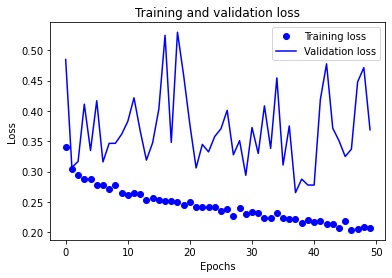

In [105]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# "bo" is for "blue dot"
plt.plot(loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [106]:
print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

Accuracy on the training data:
9000/9000 [==============================] - 21s 2ms/step
0.9226666688919067

Accuracy on the test data:
1000/1000 [==============================] - 3s 3ms/step
0.8569999933242798


Indeed, we can see that our overfitting including Image Data Generator has improved. In our training model, we have decreased accuracy, and in our test it has improved from 0.85 to 0.856. It was not that huge increased as in the previous one, however 

## 5. Visualization <a name="e">

In [107]:
predicted_proba = model.predict(X_test)
predicted_proba ##1 when low is cat

array([[9.99993086e-01],
       [9.99637723e-01],
       [1.23592883e-01],
       [5.69054484e-03],
       [9.99997497e-01],
       [8.33233118e-01],
       [9.59636282e-09],
       [9.99857664e-01],
       [1.93909705e-02],
       [8.19206238e-04],
       [9.99951005e-01],
       [9.85574603e-01],
       [8.83606076e-02],
       [7.93132858e-06],
       [7.35625803e-01],
       [1.04559958e-02],
       [2.49318480e-02],
       [9.74838138e-01],
       [7.07066059e-02],
       [1.20019913e-03],
       [8.07559967e-01],
       [1.33388625e-07],
       [4.76878881e-01],
       [1.44958496e-04],
       [9.98252571e-01],
       [4.15696777e-05],
       [7.87673593e-01],
       [1.32782459e-02],
       [7.19105661e-01],
       [4.34272617e-01],
       [3.61233906e-05],
       [9.99153495e-01],
       [8.14123988e-01],
       [6.56442580e-06],
       [2.57020593e-02],
       [9.98734474e-01],
       [9.95142698e-01],
       [8.20484996e-01],
       [9.58778739e-01],
       [9.95245159e-01],


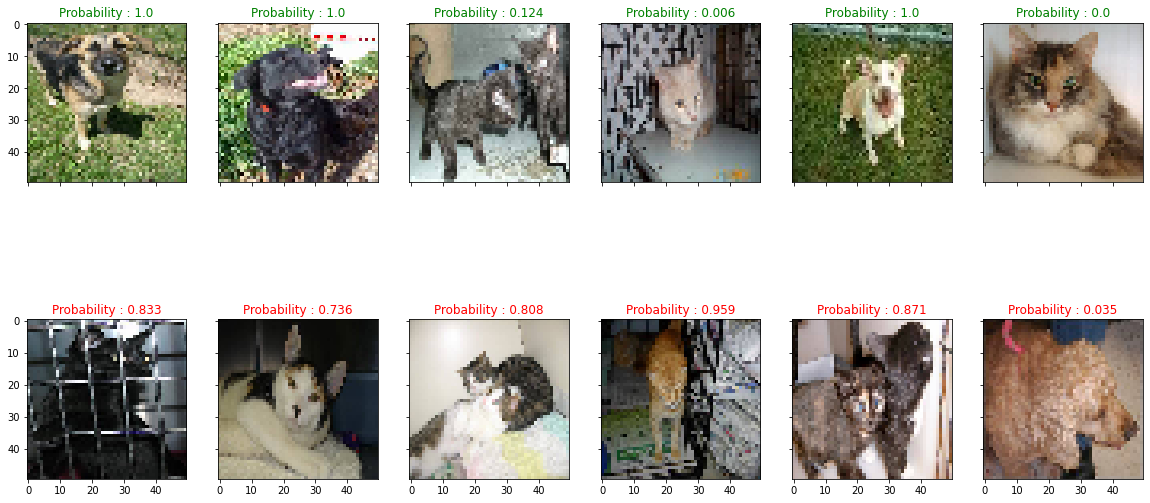

## 6. Testing model on a picture  <a name="f">

In [11]:
### Loading model

model.load_weights('ALEXANDRA_GOLAB_41712_model.h5')
model.evaluate(X_test, y_test)

1000/1000 [==============================] - 3s 3ms/step


[0.32611611269414426, 0.8700000047683716]

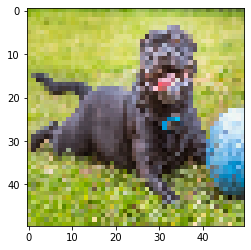

In [12]:
## uploading the test image
img = load_img('test_1.jpg', target_size=(50, 50))
image_into_array = img_to_array(img)

plt.imshow(image_into_array / 255)
plt.show()

In [13]:
### shape of the image before using expand dims 
print(image_into_array.shape)

(50, 50, 3)


In [14]:
image_test = np.expand_dims(image_into_array, axis=0)
image_test /= 255.
### shape of the image

print(image_test.shape)

(1, 50, 50, 3)


In [15]:
prediction = model.predict(image_test)
print(prediction)

[[0.56649494]]


## 7 . Saving model<a name="g">

In [111]:
model.save_weights('ALEXANDRA_GOLAB_41712_model.h5')